---
title: STATS 3DA3
subtitle: Homework Assignment 6
author: "Khizar Khan 400262423"
date: 04/18/2024
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true
fontsize: 11pt
geometry: margin = 1in
linestretch: 1.5
---

\newpage

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score

Cite data

In [235]:
from ucimlrepo import fetch_ucirepo 
chronic_kidney_disease = fetch_ucirepo(id=336) 
X1 = chronic_kidney_disease.data.features
y1 = chronic_kidney_disease.data.targets 

df = pd.concat([X1, y1])

In [236]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,NaN
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,NaN
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,NaN
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,NaN
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notckd
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notckd
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notckd
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,notckd


In [237]:
df['class'].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [238]:
#replacing the entry with a tab in it 
df['class'] = df['class'].replace('ckd\t', 'ckd')


In [239]:
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

(1) We want to predict whether or not a patient has chronic kidney disease based on medical information about the patient 

(2) Transforming variables

In [240]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

No variable transformations are necessary as all of the categorical variables are object class and the numerical variables are integer class.

(3)

In [241]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe     

(800, 25)

Dataset has 25 variables, in which 14 are numerical variables and 11 categorical variables, and 800 observation 

In [242]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


The mean age of the individuals in the dataset is 51 with a standard deviation of 12.

(4) We will anaylze the association between the variables by creating a heatmap to analyze the correlation between the numerical variables, and for the categorical variables we will plot each of them on a bar graph and analyze the ratio 

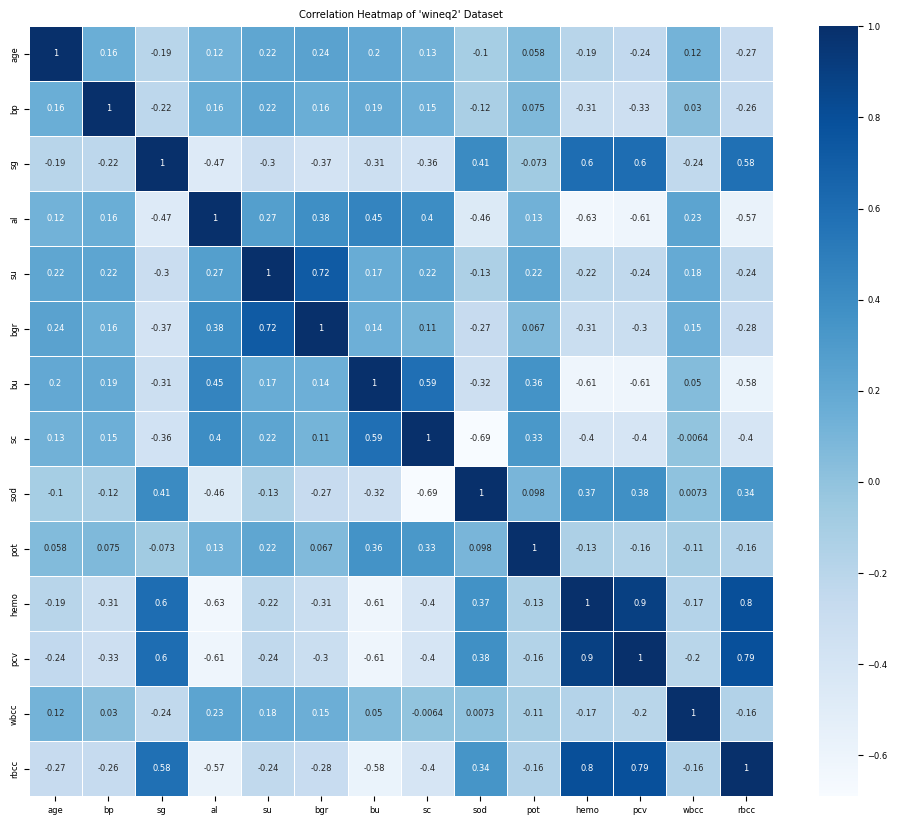

In [243]:
numeric_columns = df.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()
plt.rcParams.update({'font.size': 6})

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, 
            annot = True,
            cmap='Blues', 
            linewidths=0.5)

plt.title("Correlation Heatmap of 'wineq2' Dataset")
plt.show()

From the heatmap, we can see that 2 variables with the highest correlation are blood glucose random	and sugar. We can also see that the lowest correlation is between hemoglobin and albumin

C:\Users\khiza\AppData\Local\Temp\ipykernel_13600\2253863078.py:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
c:\Users\khiza\Downloads\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


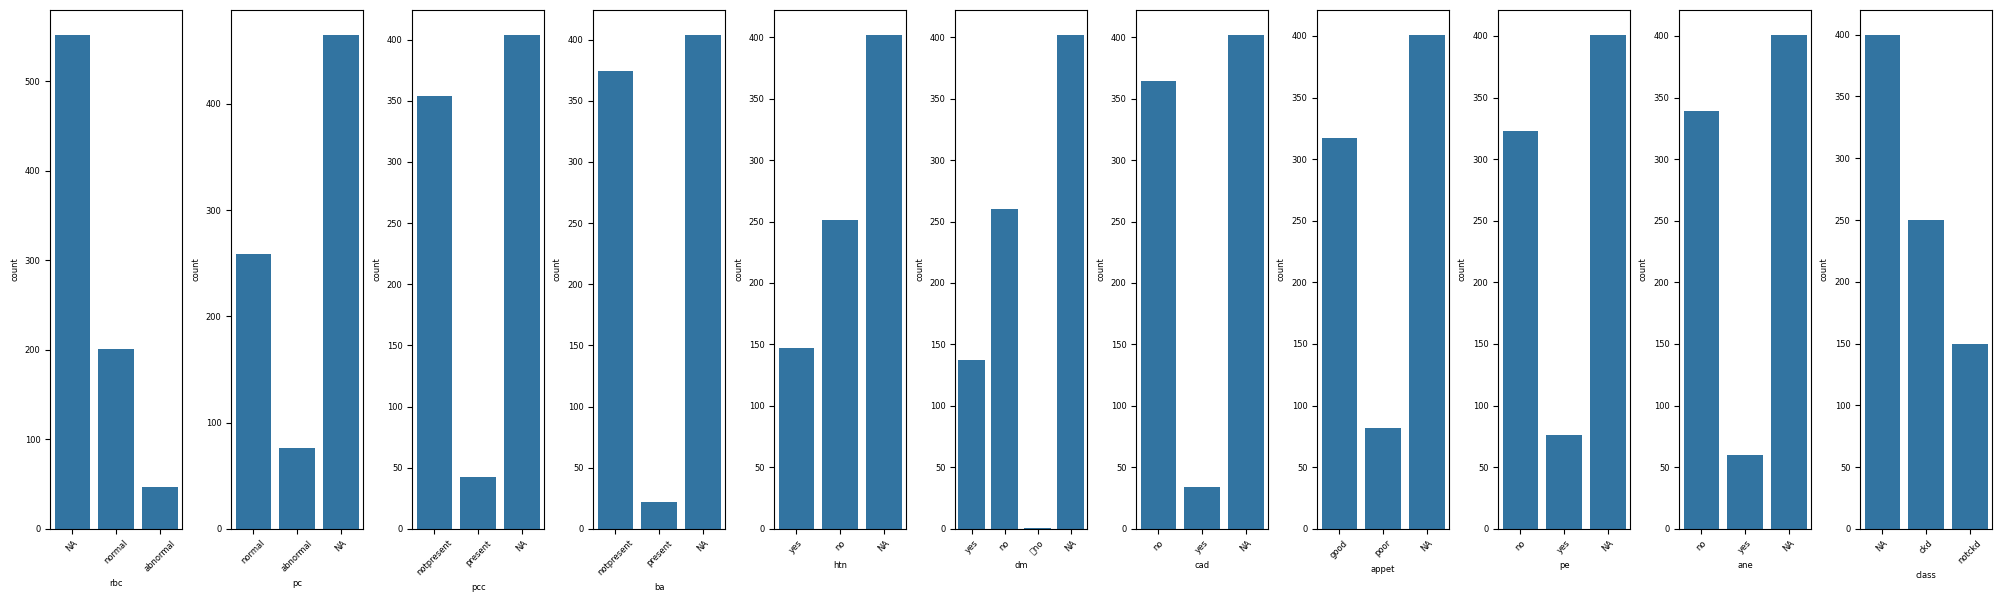

In [244]:
catag_columns = df.select_dtypes(include=['object'])
catag_columns = catag_columns.fillna("NA")

num_cols = len(catag_columns.columns)
num_rows = 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

for i, column in enumerate(catag_columns.columns):
    sns.countplot(x=column, data=catag_columns, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

The vast majority of individuals do not have coronary artery disease	

(5) Missing value analysis

In [245]:
df.isnull().sum()

age      409
bp       412
sg       447
al       446
su       449
rbc      552
pc       465
pcc      404
ba       404
bgr      444
bu       419
sc       417
sod      487
pot      488
hemo     452
pcv      471
wbcc     506
rbcc     531
htn      402
dm       402
cad      402
appet    401
pe       401
ane      401
class    400
dtype: int64

In [246]:
df2 = df.dropna()
df2

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class


Using the pd.dropna() function removes all entries from the dataset, likely because every row has at least 1 variable with a missing value. So we have to address the missing values in a different way. We will instead replace all the missing entries with the mean value of it's respective column for the numerical variables and for the categorical variables, because most of the categorical variables have a dominanting value, we will replace the missing values with that value. For the target class, we will replace missing values with "NA" to represent they are missing.

In [247]:
#calculating the mean of each row 
mean_values = df.select_dtypes(include=['number']).mean()
mean_values


age       51.483376
bp        76.469072
sg         1.017408
al         1.016949
su         0.450142
bgr      148.036517
bu        57.425722
sc         3.072454
sod      137.528754
pot        4.627244
hemo      12.526437
pcv       38.884498
wbcc    8406.122449
rbcc       4.707435
dtype: float64

In [248]:
df = df.fillna(mean_values)

In [249]:
#cat_columns = df.select_dtypes(include=['object']).columns

In [250]:
df['class'] = df['class'].fillna("NA")

In [251]:
df['rbc'] = df['rbc'].fillna("normal")
df['pc'] = df['pc'].fillna("normal")
df['pcc'] = df['pcc'].fillna("notpresent")
df['ba'] = df['ba'].fillna("notpresent")
df['htn'] = df['htn'].fillna("no")
df['dm'] = df['dm'].fillna("no")
df['cad'] = df['cad'].fillna("no")
df['appet'] = df['appet'].fillna("good")
df['pe'] = df['pe'].fillna("no")
df['ane'] = df['ane'].fillna("yes")

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.000000,1.020000,1.000000,0.000000,normal,normal,notpresent,notpresent,121.000000,...,44.000000,7800.000000,5.200000,yes,yes,no,good,no,no,NA
1,7.000000,50.000000,1.020000,4.000000,0.000000,normal,normal,notpresent,notpresent,148.036517,...,38.000000,6000.000000,4.707435,no,no,no,good,no,no,NA
2,62.000000,80.000000,1.010000,2.000000,3.000000,normal,normal,notpresent,notpresent,423.000000,...,31.000000,7500.000000,4.707435,no,yes,no,poor,no,yes,NA
3,48.000000,70.000000,1.005000,4.000000,0.000000,normal,abnormal,present,notpresent,117.000000,...,32.000000,6700.000000,3.900000,yes,no,no,poor,yes,yes,NA
4,51.000000,80.000000,1.010000,2.000000,0.000000,normal,normal,notpresent,notpresent,106.000000,...,35.000000,7300.000000,4.600000,no,no,no,good,no,no,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,51.483376,76.469072,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,no,no,no,good,no,yes,notckd
396,51.483376,76.469072,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,no,no,no,good,no,yes,notckd
397,51.483376,76.469072,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,no,no,no,good,no,yes,notckd
398,51.483376,76.469072,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,no,no,no,good,no,yes,notckd


In [252]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

Now there are no more missing values

(6) We can visualize numerical variables on a boxplot to check for outliars

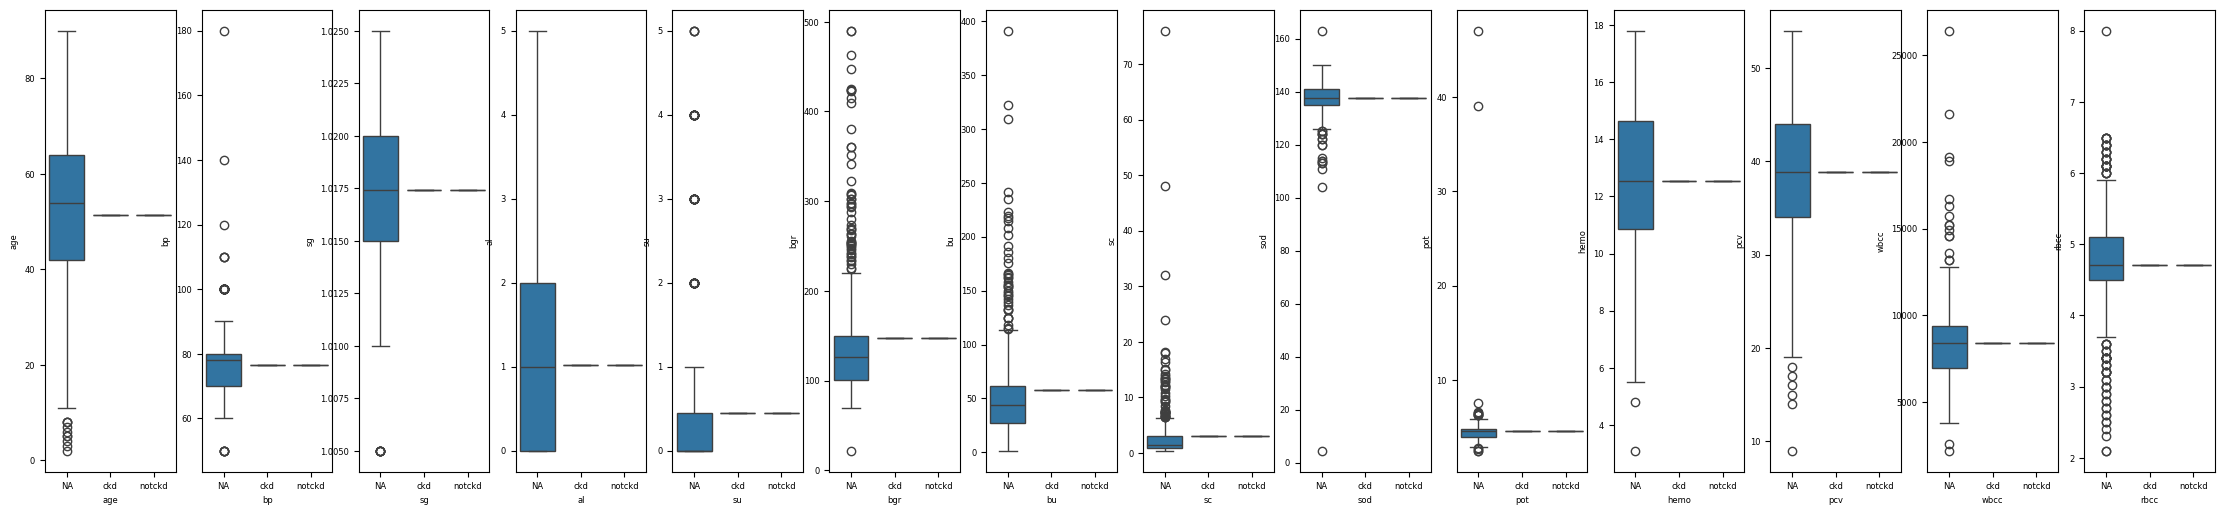

In [253]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(28, 6))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='class', y=col, data=df, ax=axes[i])
    axes[i].set_xlabel(f'{col}')
    
plt.show()

From the graph we see that there are outliers almost all of the variables, so we will remove them from the dataframe

In [254]:
df = df[(df['age']) > 16]
df = df[(df['bp']) < 90]
df = df[(df['sg']) > 1.0075]
df = df[(df['su']) < 1]
df = df[(df['bgr']) < 220]
df = df[(df['bu']) < 120]
df = df[(df['sc']) < 10]
df = df[(df['sod'] > 125) & (df['sod'] < 150)] 
df = df[(df['hemo']) > 5.5]
df = df[(df['pcv']) > 19]
df = df[(df['wbcc'] > 3500) & (df['wbcc'] < 13000)]
df = df[(df['rbcc'] > 3.8) & (df['rbcc'] < 6)]
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.000000,1.020000,1.000000,0.000000,normal,normal,notpresent,notpresent,121.000000,...,44.000000,7800.000000,5.200000,yes,yes,no,good,no,no,NA
4,51.000000,80.000000,1.010000,2.000000,0.000000,normal,normal,notpresent,notpresent,106.000000,...,35.000000,7300.000000,4.600000,no,no,no,good,no,no,NA
13,68.000000,70.000000,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,98.000000,...,38.884498,8406.122449,4.707435,yes,yes,yes,poor,yes,no,NA
16,47.000000,70.000000,1.015000,2.000000,0.000000,normal,normal,notpresent,notpresent,99.000000,...,38.884498,8406.122449,4.707435,no,no,no,good,no,no,NA
17,47.000000,80.000000,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,114.000000,...,38.884498,8406.122449,4.707435,yes,no,no,poor,no,no,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,51.483376,76.469072,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,no,no,no,good,no,yes,notckd
396,51.483376,76.469072,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,no,no,no,good,no,yes,notckd
397,51.483376,76.469072,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,no,no,no,good,no,yes,notckd
398,51.483376,76.469072,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,no,no,no,good,no,yes,notckd


(7) Subgroup analysis

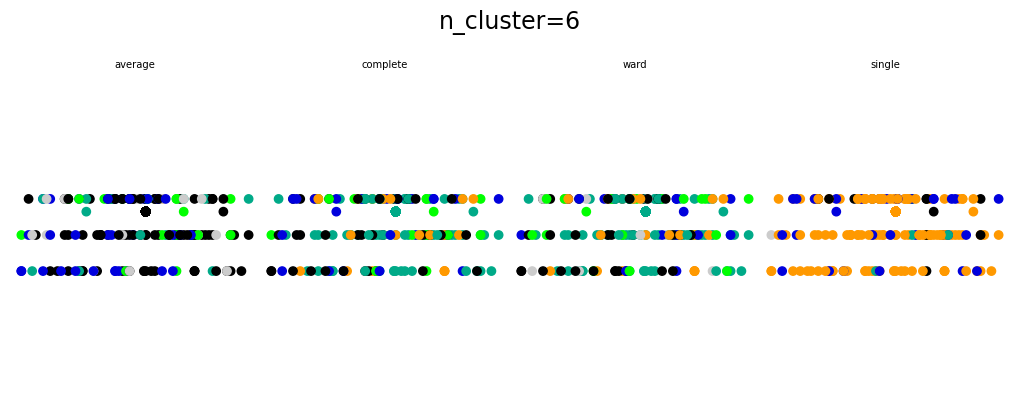

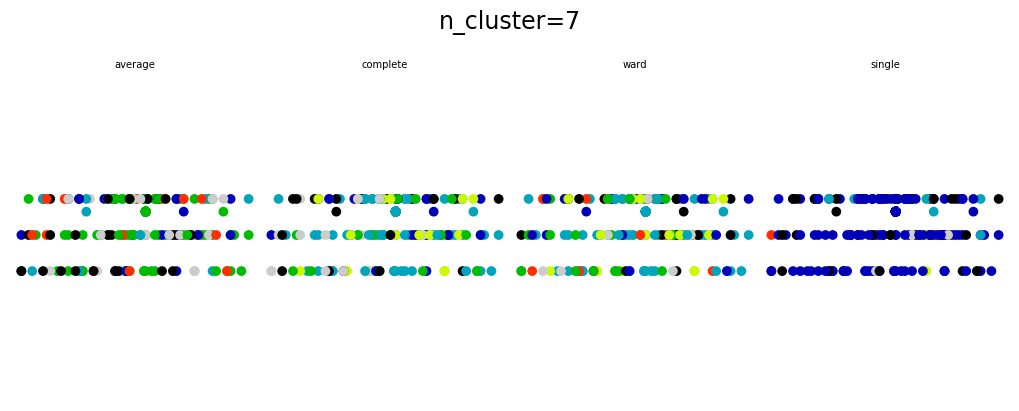

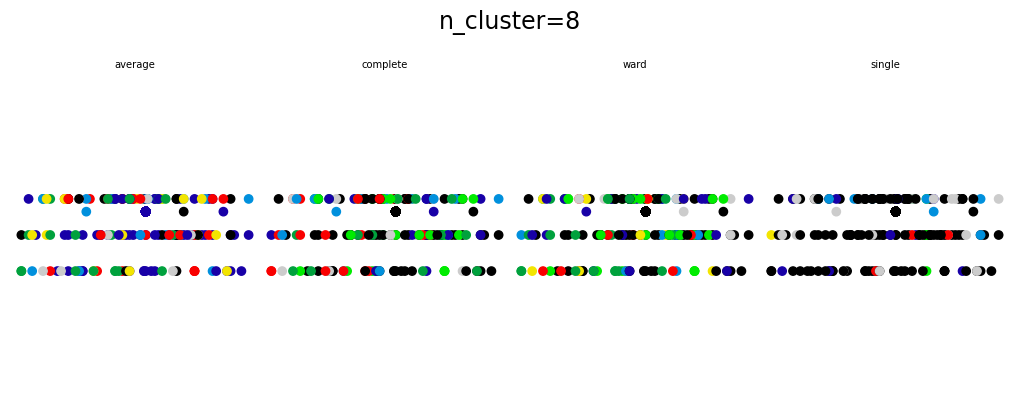

In [281]:
for n_clusters in (6,7,8):
    plt.figure(figsize=(10, 4))
    for index, linkage in enumerate(("average", "complete", "ward", "single")):
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(
            linkage=linkage, n_clusters=n_clusters
        )
        
        model.fit(df)
       
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
        plt.title((linkage),
            fontdict=dict(verticalalignment="top"),
        )
        plt.axis("equal")
        plt.axis("off")

        plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
        plt.suptitle(
            "n_cluster=%i"
            % (n_clusters),
            size=17,
        )


plt.show()


There are not any clusters therefore there are no subgroups.

(8) Splitting the data into 30% testing and 70% training

In [256]:
colcat = ['rbc' , 'pc' , 'pcc' , 'ba', 'htn' , 'dm' , 'cad' , 'appet' , 'pe', 'ane', 'class']

for col in colcat:
    df[col] = pd.Categorical(df[col]).codes

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.000000,1.020000,1.000000,0.000000,1,1,0,0,121.000000,...,44.000000,7800.000000,5.200000,1,1,0,0,0,0,0
4,51.000000,80.000000,1.010000,2.000000,0.000000,1,1,0,0,106.000000,...,35.000000,7300.000000,4.600000,0,0,0,0,0,0,0
13,68.000000,70.000000,1.017408,1.016949,0.450142,1,1,0,0,98.000000,...,38.884498,8406.122449,4.707435,1,1,1,1,1,0,0
16,47.000000,70.000000,1.015000,2.000000,0.000000,1,1,0,0,99.000000,...,38.884498,8406.122449,4.707435,0,0,0,0,0,0,0
17,47.000000,80.000000,1.017408,1.016949,0.450142,1,1,0,0,114.000000,...,38.884498,8406.122449,4.707435,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,51.483376,76.469072,1.017408,1.016949,0.450142,1,1,0,0,148.036517,...,38.884498,8406.122449,4.707435,0,0,0,0,0,1,2
396,51.483376,76.469072,1.017408,1.016949,0.450142,1,1,0,0,148.036517,...,38.884498,8406.122449,4.707435,0,0,0,0,0,1,2
397,51.483376,76.469072,1.017408,1.016949,0.450142,1,1,0,0,148.036517,...,38.884498,8406.122449,4.707435,0,0,0,0,0,1,2
398,51.483376,76.469072,1.017408,1.016949,0.450142,1,1,0,0,148.036517,...,38.884498,8406.122449,4.707435,0,0,0,0,0,1,2


In [257]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [258]:
X_scale = X.copy() 
scaler = StandardScaler()

X_scale[numerical_cols] = scaler.fit_transform(X_scale[numerical_cols])

In [259]:
X_train, X_test, y_train, y_test = train_test_split(
X_scale,
y,
test_size=0.30,
train_size = 0.70,
random_state=1,
stratify=y
)


(9) The two classifiers that we will be using are decision tree and logistic regression. The reason for why these classifiers were chosen is because we don't know if the data is linear or not. Decision tree does not assume the data is linear, but it is overfitting and has high variance, where as logistic regression assumes the data is linear so it may yield more accurate results if the data is linear.

Starting with logistic regression:

In [260]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc         int8
pc          int8
pcc         int8
ba          int8
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn         int8
dm          int8
cad         int8
appet       int8
pe          int8
ane         int8
dtype: object

In [261]:
logistic_df = LogisticRegression()

logistic_df.fit(X_train, y_train)

LogisticRegression()

In [262]:
pred_prob = logistic_df.predict_proba(X_test)

In [263]:
prob = pd.DataFrame(data = {'prob0': pred_prob[:,1], 'y_test': y_test})
prob

,prob0,y_test
196,6.212971e-01,1
47,6.212971e-01,1
379,6.212971e-01,2
359,7.852660e-08,0
338,8.979604e-05,0
...,...,...
158,6.212971e-01,1
235,1.032372e-03,0
66,6.212971e-01,1
322,1.006085e-02,0


In [264]:
prob['y_test_pred'] = prob.prob0.map(lambda x: 1 if x>0.5 else 0)
prob.head()

,prob0,y_test,y_test_pred
196,6.212971e-01,1,1
47,6.212971e-01,1,1
379,6.212971e-01,2,1
359,7.852660e-08,0,0
338,8.979604e-05,0,0


In [265]:
cm = confusion_matrix(prob.y_test, prob.y_test_pred)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[51  0  0]
 [ 0 75  0]
 [ 0 45  0]]


In [266]:
#####from confusion matrix calculate accuracy
total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7368421052631579
Sensitivity :  1.0
Specificity :  1.0


Decision tree:

In [267]:
cs_dt = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
) 

In [268]:
cs_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

[Text(0.3333333333333333, 0.875, 'ane <= 0.5\ngini = 0.649\nsamples = 399\nvalue = [119, 175, 105]\nclass = Yes'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 114\nvalue = [114, 0, 0]\nclass = No'),
 Text(0.5, 0.625, 'al <= 0.276\ngini = 0.487\nsamples = 285\nvalue = [5, 175, 105]\nclass = Yes'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = No'),
 Text(0.6666666666666666, 0.375, 'sc <= 2.549\ngini = 0.473\nsamples = 281\nvalue = [1, 175, 105]\nclass = Yes'),
 Text(0.5, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.125, '\n  (...)  \n')]

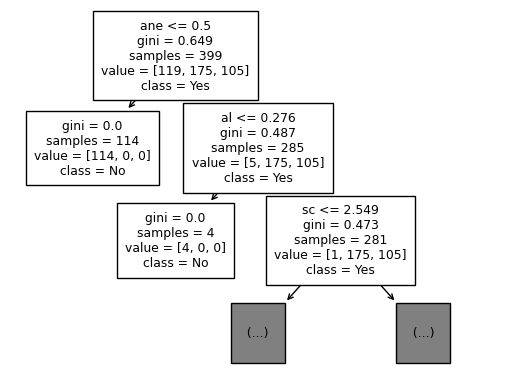

In [269]:
plot_tree(
    cs_dt, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['No', 'Yes']
)

In [270]:
pred = cs_dt.predict(X_test)
pred[:5]

array([1, 1, 1, 0, 0], dtype=int8)

In [271]:
cm4 = pd.DataFrame(confusion_matrix(y_test, pred), index=['NA', 'Yes', 'No'], columns=['NA', 'Yes', 'No'])
cm4.index.name = 'True'
cm4.columns.name = 'Predicted'
cm4

Predicted,NA,Yes,No
True,,,
NA,47,4,0
Yes,0,75,0
No,0,45,0


In [272]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        51
           1       0.60      1.00      0.75        75
           2       0.00      0.00      0.00        45

    accuracy                           0.71       171
   macro avg       0.53      0.64      0.57       171
weighted avg       0.56      0.71      0.62       171



c:\Users\khiza\Downloads\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khiza\Downloads\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khiza\Downloads\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(10) The 2 metrics that we will be using are accuracy and sensitivity. Sensitivity tells us the true positive rate, so it is important for this value to be high or else the model will falsely predict that a patient has chronic kidney disease, and accuracy of the model is important so we don't have too many falsepositives as well. 

(11) We can improve the decision tree classifier by using PCA with 95% variability

In [273]:
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
pca_X = PCA(0.95)

In [274]:
X_pca = pca_X.fit_transform(X)

In [275]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X_scale), index=X.index)

In [276]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.30,
    train_size = 0.70,
    random_state=1,
    stratify=y
)

In [277]:
cs_dt.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [278]:
pred2 = cs_dt.predict(X_test_pca)
pred2[:5]

array([1, 1, 1, 0, 0], dtype=int8)

In [279]:
cs_dt.score(X_train_pca, y_train)

0.7368421052631579

In [280]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.62      1.00      0.77        75
           2       0.00      0.00      0.00        45

    accuracy                           0.73       171
   macro avg       0.54      0.66      0.59       171
weighted avg       0.57      0.73      0.63       171



c:\Users\khiza\Downloads\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khiza\Downloads\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khiza\Downloads\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(12) The modified decision tree classifier has a higher accuracy and sensitivity than the unmodified version. The accuracy of this classifier is equal to that of the logistic classifier, and sensitivity is slightly lower.